# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

FoodHub, a food aggregator company, bridges the gap between rising number restaurants and their customers through their mobile app.

The company wants to enhance the customer experience by analysing the demand of different restaurants based on the order details stored in their online portal.


### Data Dictionary

The orders data from the portal is fetched in the csv format. The structure of data and business significance of each field is given below:

1. order_id : Unique ID of the order
2. customer_id : ID of the registered customer who ordered the food.
3. restaurant_name : Name of the restaurant from which food is ordered.
4. cuisine_type : Cuisine ordered by the customer
5. cost_of_the_order : Cost of the order
6. day_of_the_week : Indicates whether the order wass placed on a weekday or a weekend, considering start of the week on Monday.
7. rating : Rating given by the customer out of 5
8. food_preparation_time : pick_up_time - order_confirmation_time
9. delivery_time : delivery_timestamp - pick_up_time

given the fine grained transaction records, it is possible to analyse multiple business questions.

### Let us start by importing the required libraries

In [2]:
# Write your code here to import necessary libraries for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/GL AIML/Projects/week 1/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:

There are four string columns, four integer columns including the IDs and one float columns 'cost_of_the_order'.


In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum().sum()


np.int64(0)

#### Observations:

There are no null values in the dataframe. Hence there is no need to process.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# minimum time for food preparation

df['food_preparation_time'].min()

20

In [ ]:
# average time for food preparation in minutes
print(df['food_preparation_time'].mean())

27.371970495258168


In [ ]:
# maximum time for food preparation
print(df['food_preparation_time'].max())

35


#### Observations:
The food_preparation_time column has a **minimum** value of **20 minutes**, **maximum** value of **35 minutes**, which indicates that the food preparation times range over 15 minutes., with **most dishes taking around 27 minutes** to prepare. Since the mean lies closer to the center of the range, the data appears to be **fairly evenly distributed** without extreme skewness. The relatively narrow spread suggests moderate **consistency in preparation times** across different food items across restaurants.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
print(df.loc[df['rating']=='Not given'].count()['order_id'])

736


#### Observations:

Out of 1898 orders placed, **736** are not rated. So 4 in 10 customers hesitate to provide the feedback. This indicates a significant portion of the customers are **not engaging with the feedback system**, which may **impact the overall rating metrics**. Encouraging more customers to rate their orders could help in gaining better insights into the customer satisfaction and service quality.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

I am choosing cost_of_the_order, rating, food_preparation_time, delivery_time for univariate analysis since they are numerical columns

#### 1. Cost of the order

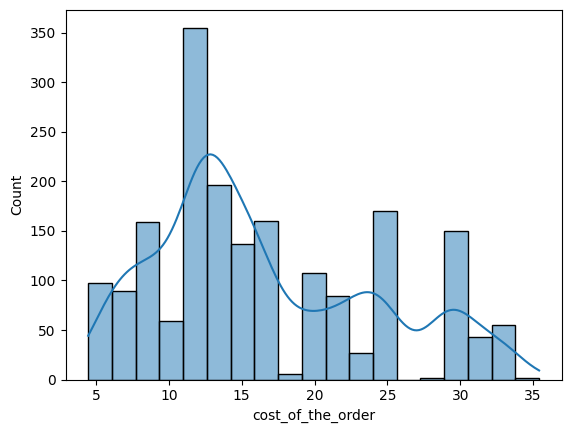

In [ ]:
# cost of the order distribution
sns.histplot(df, x='cost_of_the_order', kde='True');

**Observation** : The cost per order is more fairly distributed across the range from $5 to $35 and multimodal.

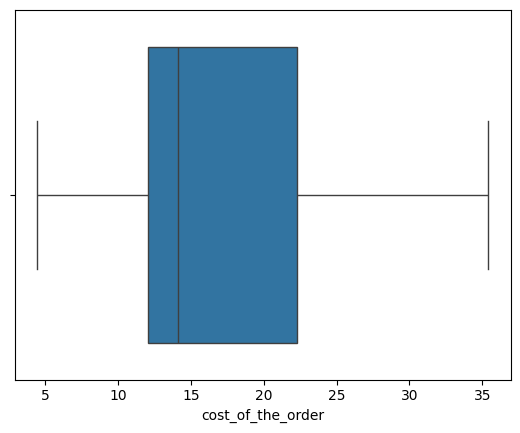

In [ ]:
# Looking for the outliers in the cost

sns.boxplot(df, x='cost_of_the_order');

**Observation **: From the boxplot it appears that there are no outliers but the data is right sqewed with frequency of orders with higher value are more when compared to those of low value orders.

#### 2. ratings

In [ ]:
#fetching only those ratings where order is rated
df_ratings = df.loc[df['rating']!='Not given']

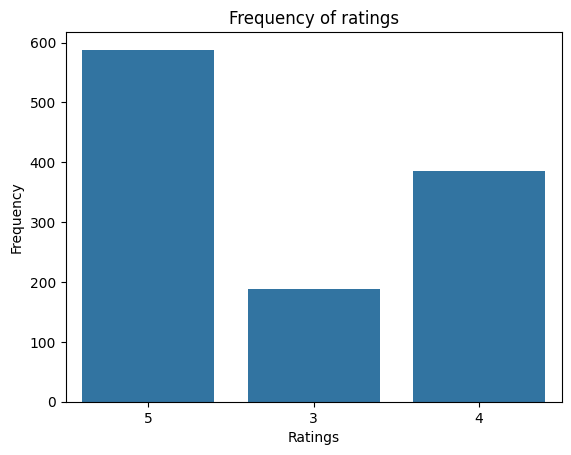

In [ ]:
plt.title('Frequency of ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
sns.countplot(df_ratings, x='rating');

#### 3. Food Preparation Time

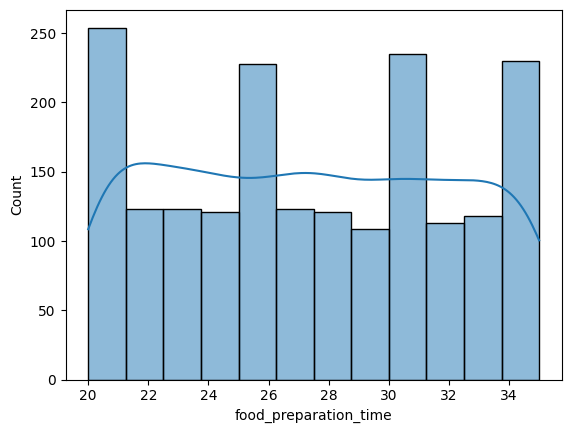

In [ ]:
# The distribution
sns.histplot(df, x='food_preparation_time', kde='True');

**Observation** : The food preparation time has been consistent across restaurants across cuisine types.

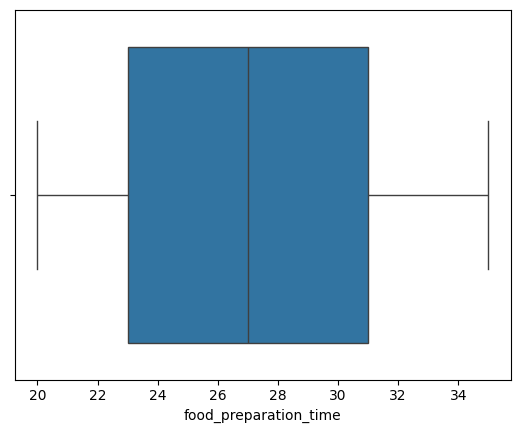

In [ ]:
sns.boxplot(df, x='food_preparation_time');

**Observation** : The consistency is validated by the box plot

#### 4. Delivery time

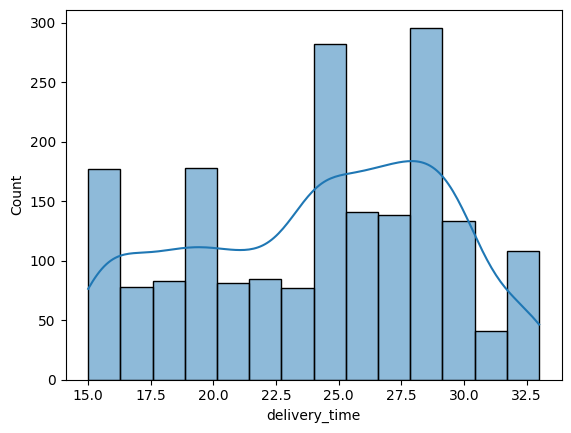

In [ ]:
# Distribution
sns.histplot(df, x='delivery_time', kde='True');

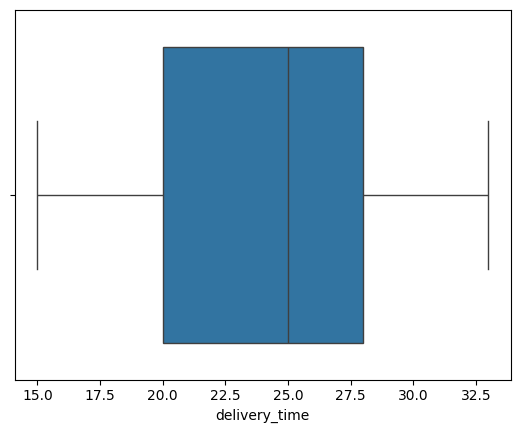

In [ ]:
sns.boxplot(df, x='delivery_time');

**Observation** : The data is left skewed suggesting most of the deliveries take less time, and there are no outliers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head()

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: There's a sharp drop in order volume after the top restaurant - Shake Shack has over 65% more orders than the second-place restaurant. Two restaurants from Blue ribbon group (Sushi and fried chicken) appear in the top five, which may suggest a strong brand presence and customer loyalty.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df.loc[df['day_of_the_week']=='Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1)


,order_id
cuisine_type,
American,415


#### Observations: American cuisine is most popular on the weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
above_20 = df.loc[df['cost_of_the_order']>20]['order_id'].count()
all = df['order_id'].count()
percent = (above_20/all)*100
print(percent)

29.24130663856691


#### Observations: 29.24% of all the orders cost above $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
print(df['delivery_time'].mean())

24.161749209694417


#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df.groupby(df['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations: Customer 52832 is the most ordered customer with 13 orders, followed by customer 47440 with 10 orders. Customer 83287 is the 3rd most frequently ordering customer who has placed 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### 1. Numerical versus numerical

<ipython-input-16-9f17d0662935>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cost['rating'] = df_cost['rating'].astype(int)
<ipython-input-16-9f17d0662935>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df_cost, x='rating', y='cost_of_the_order', ci=False);


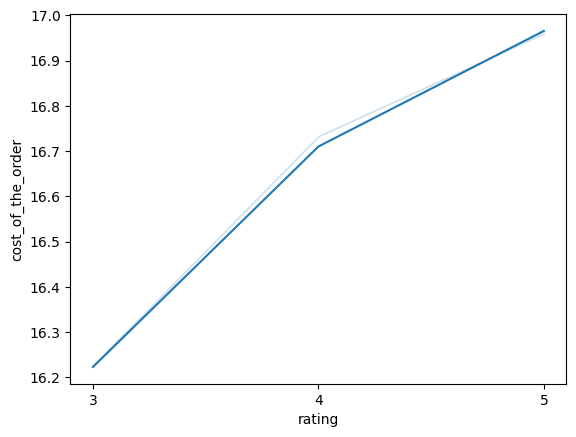

In [16]:
# Relation between rating and cost of the order
df_cost = df.loc[df['rating']!='Not given']
df_cost['rating'] = df_cost['rating'].astype(int)
plt.xticks(ticks=range(0, 6, 1))
sns.lineplot(df_cost, x='rating', y='cost_of_the_order', ci=False);
plt.show()

Observation : The rating is positively correlated with ratings.

<ipython-input-29-177610f88c8c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df_cost, x='rating', y='food_preparation_time', ci=False);


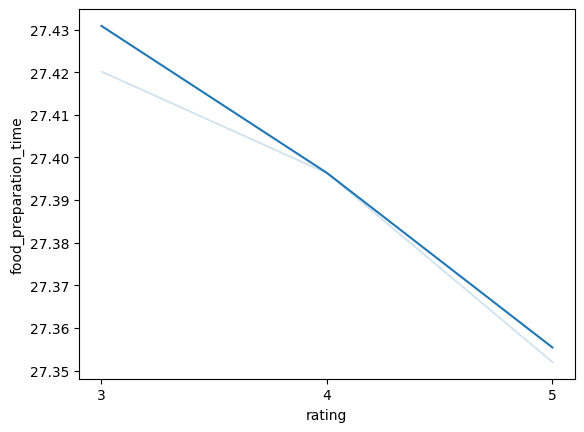

In [29]:
# Relation between rating and food_preparation_time
plt.xticks(ticks=range(0, 6, 1))
sns.lineplot(df_cost, x='rating', y='food_preparation_time', ci=False);
plt.show()

Observation : More the food prepation time lesser the rating suggesting customers like food which are served to them quickly.

<ipython-input-30-c72e68e800fc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(df_cost, x='rating', y='delivery_time', ci=False);


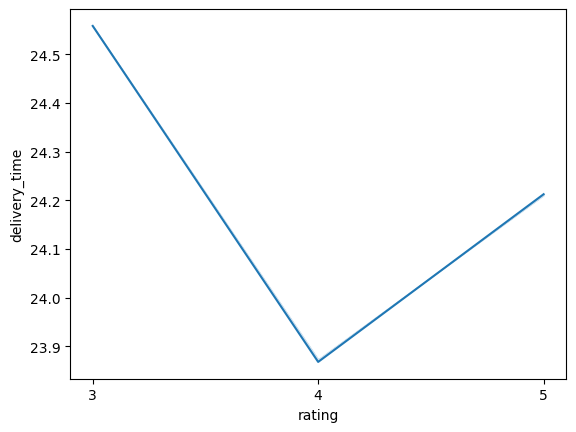

In [30]:
# Relation between rating and delivery_time
plt.xticks(ticks=range(0, 6, 1))
sns.lineplot(df_cost, x='rating', y='delivery_time', ci=False);
plt.show()

Observation: There is no evident correlation between rating and the delivery time.

##### Relation between different numerical columns

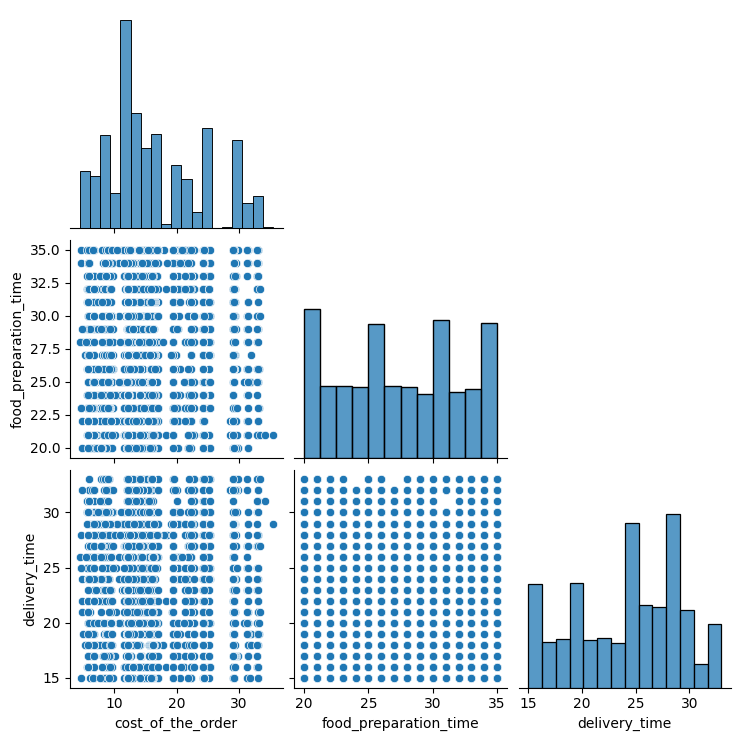

In [18]:
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time']], corner=True)

Observation : From the plots of different numerical columns it can be seen that all of them are independent.

###### Heatmap

<Axes: >

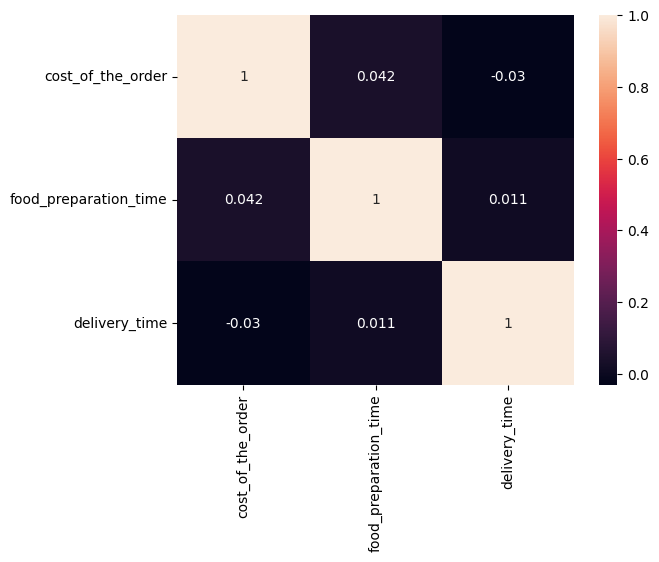

In [20]:
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True)

Observation : It is evident from the above heatmap that there is no correlation between the numerical columns of the dataset.

### Numerical and categorical

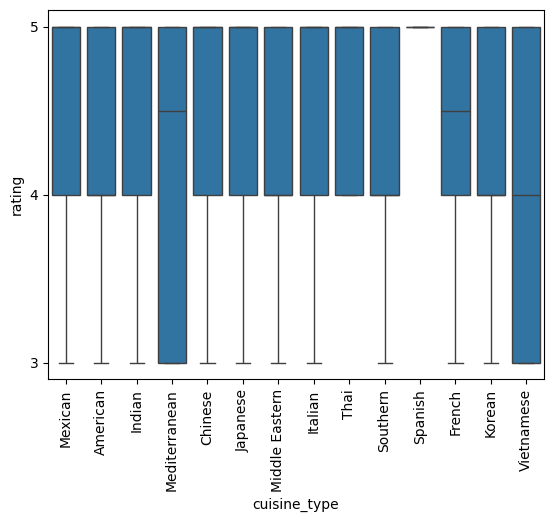

In [26]:
#Cuisine type and ratings
plt.yticks(ticks=range(0, 6, 1))
plt.xticks(rotation = 90)
sns.boxplot(df_cost, x='cuisine_type', y='rating', showfliers=False);

Observation : For most of the cuisine types ratings are skewed to right except for mediterranean and vietnamese. Most Spanish dishes get 5 star rating. More closer examination is required for orders with spanish cuisine type.

In [27]:
df_cost.loc[df_cost['cuisine_type']=='Spanish']['rating'].value_counts()

,count
rating,
5,5
4,1


Observation : it is validated that most spanish cuisines get 5 star ratings, if at all rated.

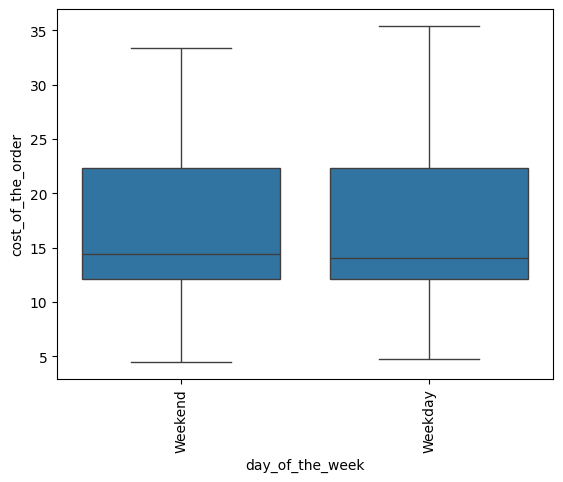

In [28]:
# Week of the day and cost_of_the_order
plt.xticks(rotation = 90)
sns.boxplot(df, x='day_of_the_week', y='cost_of_the_order', showfliers=False);

**Observation** : The cost of the order doesn't show much variation between weekendds and weekdays. Nevertheless the right whisker is longer for the weekends suggesting people will to spend more. On a given day 50% of the orders are above $15.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
eligible_restaurants = df_cost.groupby('restaurant_name').agg({'rating':['count','mean']})
eligible_restaurants.loc[(eligible_restaurants['rating']['count']>50) & (eligible_restaurants['rating']['mean']>4)]


rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

#### Observations: There are 4 restaurants which qualify for the promotional offer. Blue Ribbon group again proves to be a trusted group.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [46]:
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5 and row['cost_of_the_order'] <= 20 :
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

df['revenue'] = df.apply(calculate_revenue, axis=1)
print(df['revenue'].sum())

6166.303


#### Observations:
The aggregator has earned $6166.303 across all orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
df['total_time'] = df['food_preparation_time']+df['delivery_time']
percentage = (df.loc[df['total_time']>60]['order_id'].count()/df['order_id'].count())*100
print(percentage)

10.537407797681771


Observation : More than 10% of all orders take more than an hour after ordering.

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [48]:
mean_weekday = df.loc[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
mean_weekend = df.loc[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print(mean_weekday)
print(mean_weekend)

28.340036563071298
22.4700222057735


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

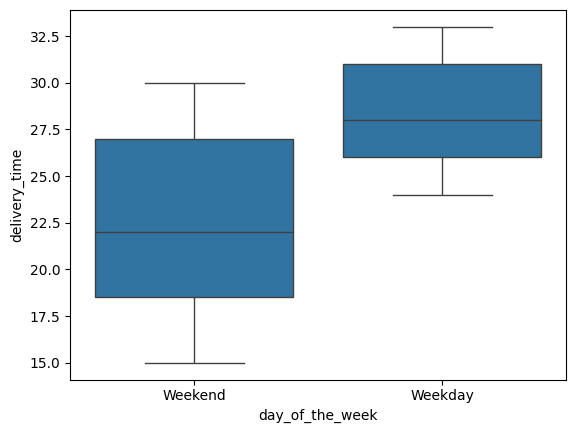

In [49]:
sns.boxplot(df, x='day_of_the_week', y='delivery_time')

#### Observations:
On a weekday it takes longer to deliver the order than on the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* **Data Overview**:

  -> There are 1,898 orders with 9 columns.

  -> Data types are mostly appropriate: 4 strings, 4 integers, and 1 float.

  -> No missing values, ensuring a clean dataset for analysis.

* **Customer Feedback**:

  -> Around 736 orders (≈ 39%) lack customer ratings, indicating a gap in feedback collection.

  -> Customer engagement with the rating system is low.

* **Cost & Cuisine Trends**:

  -> Most orders are in the \$5–$35 range.

  -> American cuisine is the most popular, especially on weekends.

  -> Roughly 29% of orders cost above $20, showing a decent premium market.

* **Restaurant & Customer Insights**:

  -> Shake Shack dominates order volume, with 65% more orders than the next best restaurant.

  -> Customer 52832 is the most frequent customer, placing 13 orders.

  -> Brands like Blue Ribbon show strong repeat engagement, hinting at brand loyalty.

* **Time Analysis**:

  -> Food preparation time ranges from 20 to 35 minutes, averaging ~27 minutes.

  -> Delivery time averages ~24 minutes, with minimal skew and no major outliers.

  -> Longer preparation time correlates with lower ratings, suggesting customer impatience.

### Recommendations:

*  **Improve Feedback Rate**:

  ->Incentivize customers (e.g., discounts or loyalty points) to submit ratings.

  -> Use pop-ups or push notifications after delivery to encourage feedback.

* **Operational Improvements**:

  -> Optimize kitchen workflows at restaurants where prep time is high to enhance customer satisfaction.

  -> Track and improve delivery logistics to keep delivery time below average.

* **Marketing Strategy**:

  -> Promote high-performing restaurants like Shake Shack and Blue Ribbon group to new users.

  -> Use successful customer patterns (like those of customer 52832) to design targeted promotions.

* **Menu and Pricing Optimization**:

  -> Highlight American cuisine more on weekends, maybe via featured banners or discounts.

  -> Upsell premium items to the 29% of customers who already spend >$20.

* **Customer Segmentation**:

  -> Segment customers based on order frequency and value to provide personalized offers.

  -> Target customers who order frequently but don’t rate, encouraging more feedback.